In [1]:
import sqlalchemy as sa
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData

In [2]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Mamello'

In [3]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

In [4]:
sql_query = "Select * from claims_data"

In [5]:
df = pd.read_sql_query(sql_query, connection)

In [6]:
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.9,3009,0,yes,southwest,yes,16884.924
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
2,28,male,33,3009,3,no,southeast,no,0
3,33,male,22.705,10009,0,no,northwest,no,0
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
## Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                1338 non-null object
sex                1338 non-null object
bmi                1338 non-null object
steps              1338 non-null object
children           1338 non-null object
smoker             1338 non-null object
region             1338 non-null object
insurance_claim    1338 non-null object
claim_amount       1338 non-null object
dtypes: object(9)
memory usage: 94.2+ KB


In [9]:
## Convert Numeric values
df['bmi'] = pd.to_numeric(df['bmi'])
df['children'] = pd.to_numeric(df['children'])
df['steps'] = pd.to_numeric(df['steps'])
df['claim_amount'] = pd.to_numeric(df['claim_amount'])
df['age'] = pd.to_numeric(df['age'])

In [10]:
# Lables
df = df[df['insurance_claim'] == 'yes']
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552
6,46,female,33.44,3002,1,no,southeast,yes,8240.5896
10,25,male,26.22,8006,0,no,northeast,yes,2721.3208


In [11]:
# Labels
y = df['claim_amount']

# Features
X = df.drop(['claim_amount', 'insurance_claim'], axis=1)

In [12]:
X.shape

(783, 7)

In [13]:
#Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [14]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

In [15]:
#Train/Test split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=50)

In [17]:
#Building a Decision Tree Regression Model
from sklearn.ensemble import RandomForestRegressor

In [18]:
forest = RandomForestRegressor(n_estimators=100, random_state=50)

In [19]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [20]:
#Predicting
pred_forest = forest.predict(X_test)

In [21]:
#Testing
from sklearn.metrics import mean_squared_error

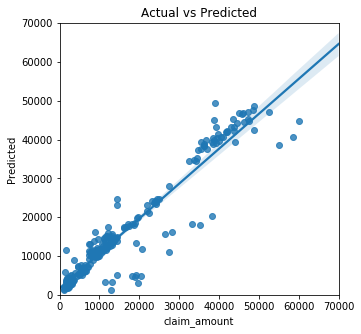

In [22]:
#Actual vs Expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_forest)

In [23]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 4613.79724712136


In [24]:
#Tuning parameters to Improve Model
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

In [25]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [26]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [27]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [28]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

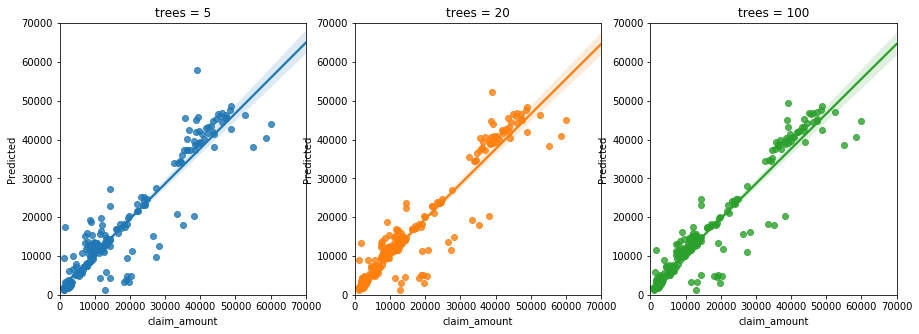

In [29]:
#Test
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

In [41]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

RMSE:
trees=5: 5137.3831364496655
trees=20: 4746.129340148775
trees=100: 4613.79724712136


In [44]:
predictions = forest.predict(X_test)
X_test.head()

,age,bmi,steps,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
366,0.708836,0.258900,-0.246143,-0.691218,-1.037749,-0.682856,-0.512741,1.481863,-0.552268
768,-0.444485,1.814254,-0.245611,0.326120,0.963624,-0.682856,-0.512741,-0.674826,1.810715
703,-1.190751,-0.819244,1.886599,-0.691218,-1.037749,-0.682856,-0.512741,-0.674826,1.810715
734,-1.122908,-0.495801,-0.242416,-0.691218,0.963624,1.464438,-0.512741,-0.674826,-0.552268
29,-1.529963,0.528435,-0.244013,-0.691218,-1.037749,-0.682856,-0.512741,-0.674826,-0.552268


In [45]:
submission = pd.DataFrame({'row_id' : X_test.index,'predictions' : predictions.ravel()}) 

In [46]:
submission.head()

,row_id,predictions
0,366,9763.753128
1,768,7257.874276
2,703,3365.885106
3,734,18016.139602
4,29,2053.864974


In [47]:
#Save the DataFrame to SQL
submission.to_sql('regression_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)

In [48]:
connection.table_names()

['claims_data',
 'classification_model_results',
 'football_players-a-1298',
 'regression_model_results',
 'test_set']